# Chapter 2 Housing Prediction

### Downloading the Data

In [160]:
#Imports
import os
import tarfile
from six.moves import urllib

#Constants
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

#Method to download the data
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data(HOUSING_URL, HOUSING_PATH)

### Analyze the Data 

In [161]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data(HOUSING_PATH)
print(housing.head())
print()
print(housing.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 2063

In [162]:
print(housing["ocean_proximity"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [163]:
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

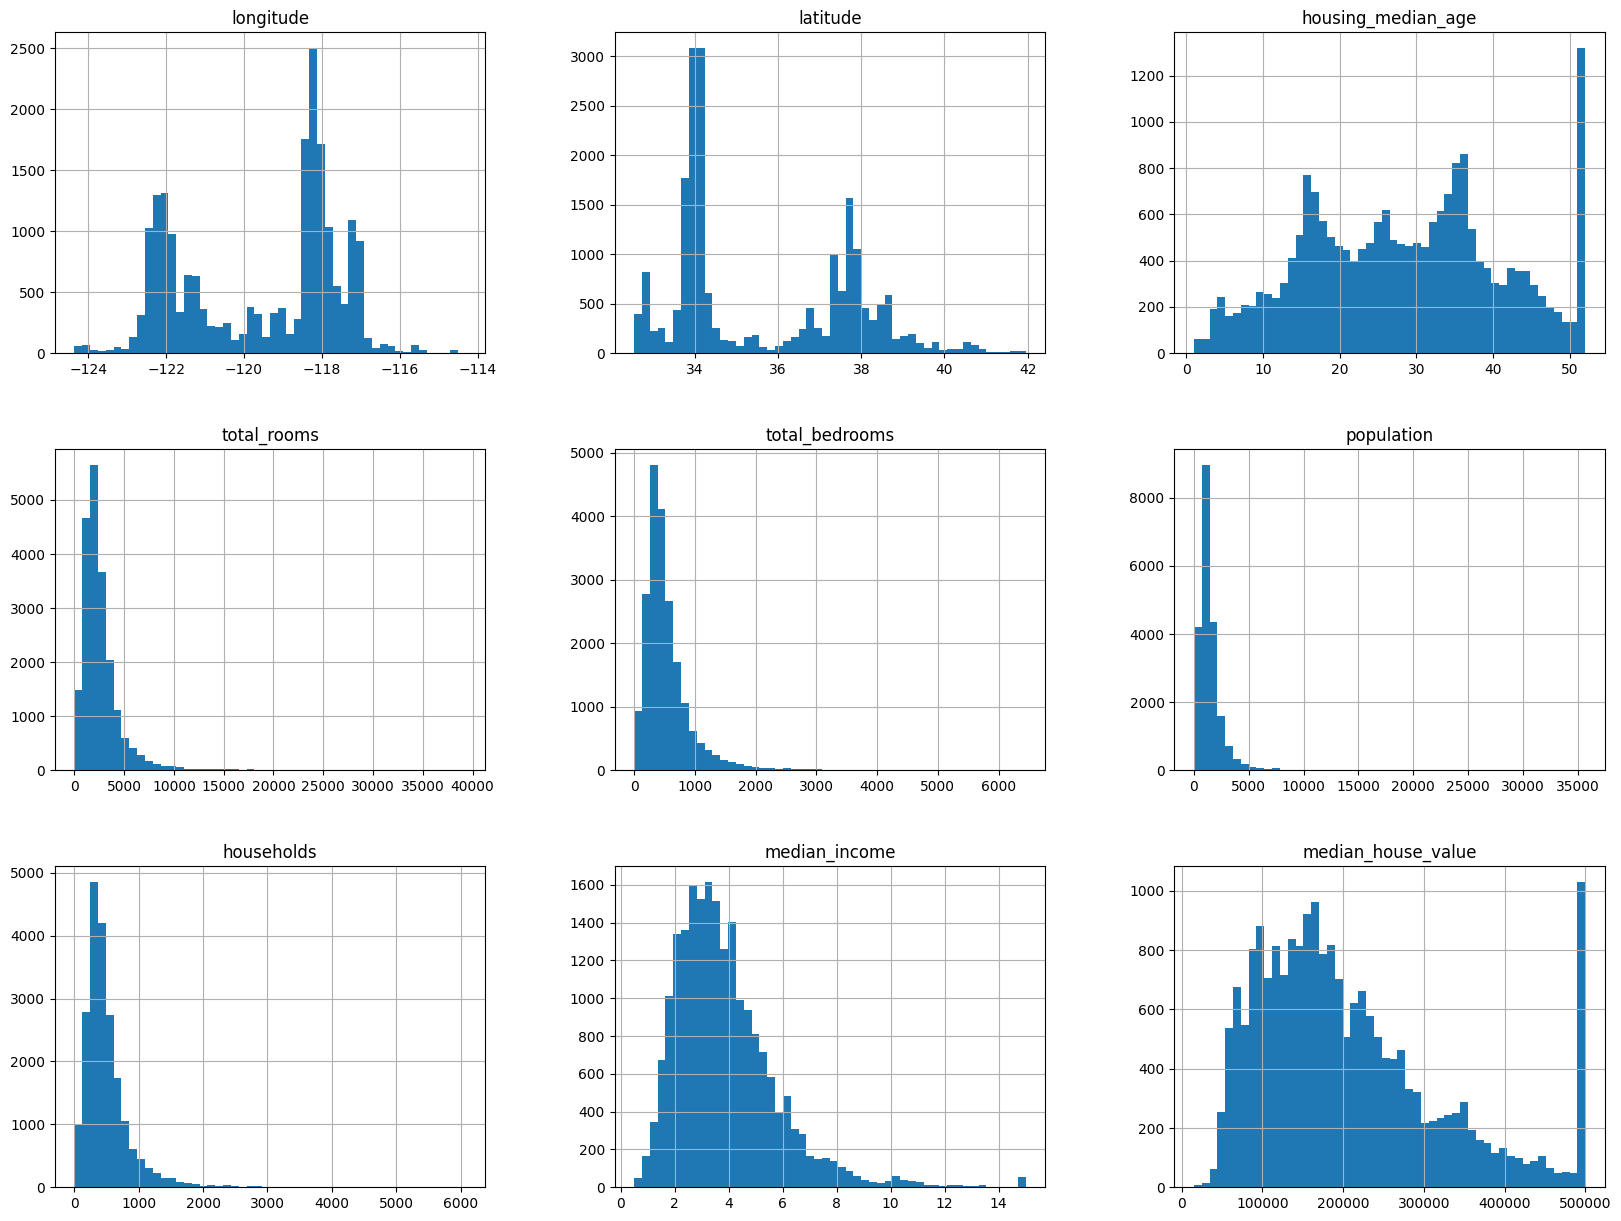

In [164]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Create the Test Set

In [165]:
#Creating your own split_train_test function
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(data=housing, test_ratio = 0.2)
print(len(train_set), len(test_set))

16512 4128


In [166]:
#Using skilearn built in train_test_split function
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), len(test_set))

16512 4128


In [167]:
housing['income_cat'] = np.ceil(housing["median_income"] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

<AxesSubplot: >

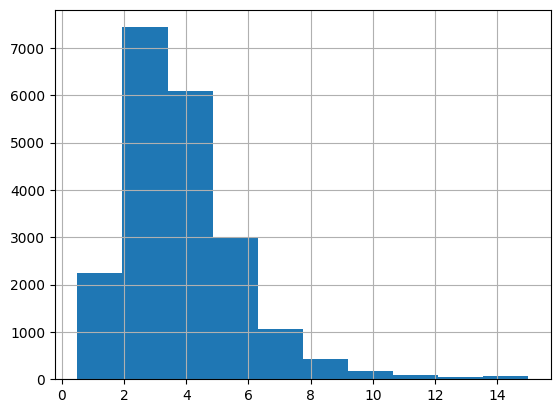

In [168]:
housing['median_income'].hist()

<AxesSubplot: >

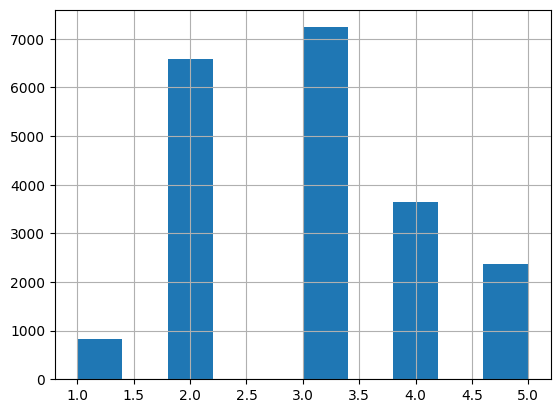

In [169]:
housing['income_cat'].hist()

In [170]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [171]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [172]:
#Removing the income_cat attribute so the data is back to normal
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### Discover and Visualize the Data to Gain Insights

In [173]:
housing_df = strat_train_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

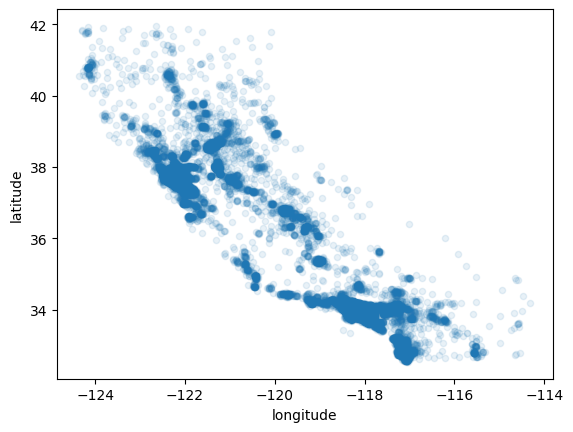

In [174]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) 
#alpha = 0.1 lets us see the high density areas better (Bay Area, Los Angeles and San Diego)

In [175]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

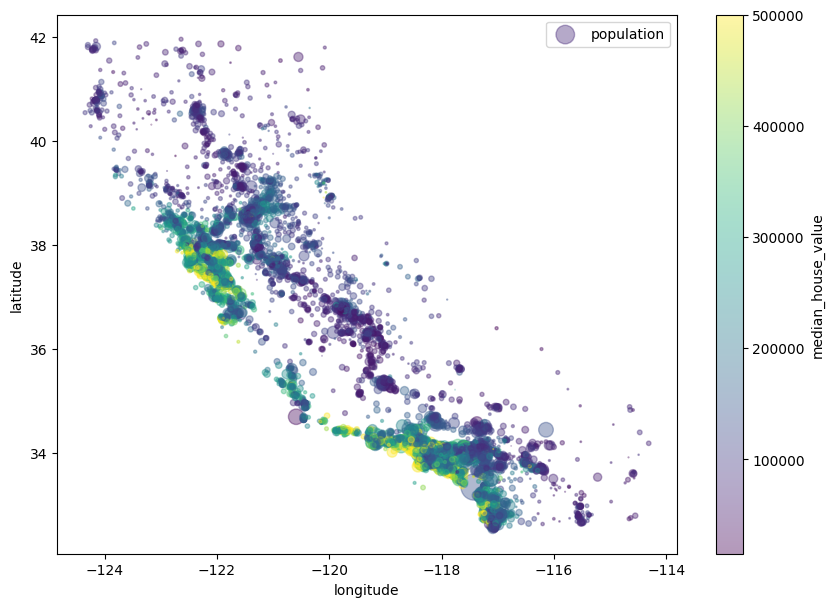

In [176]:
housing_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
                s=housing_df["population"]/100, label="population", figsize=(10,7), 
                c="median_house_value", colorbar=True

    )

plt.legend()

### Looking for Correlations

In [177]:
housing_df.corr()

/var/folders/23/9yyjjc7d5qzgg1rk2yt_yhwc0000gn/T/ipykernel_20725/3117367622.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

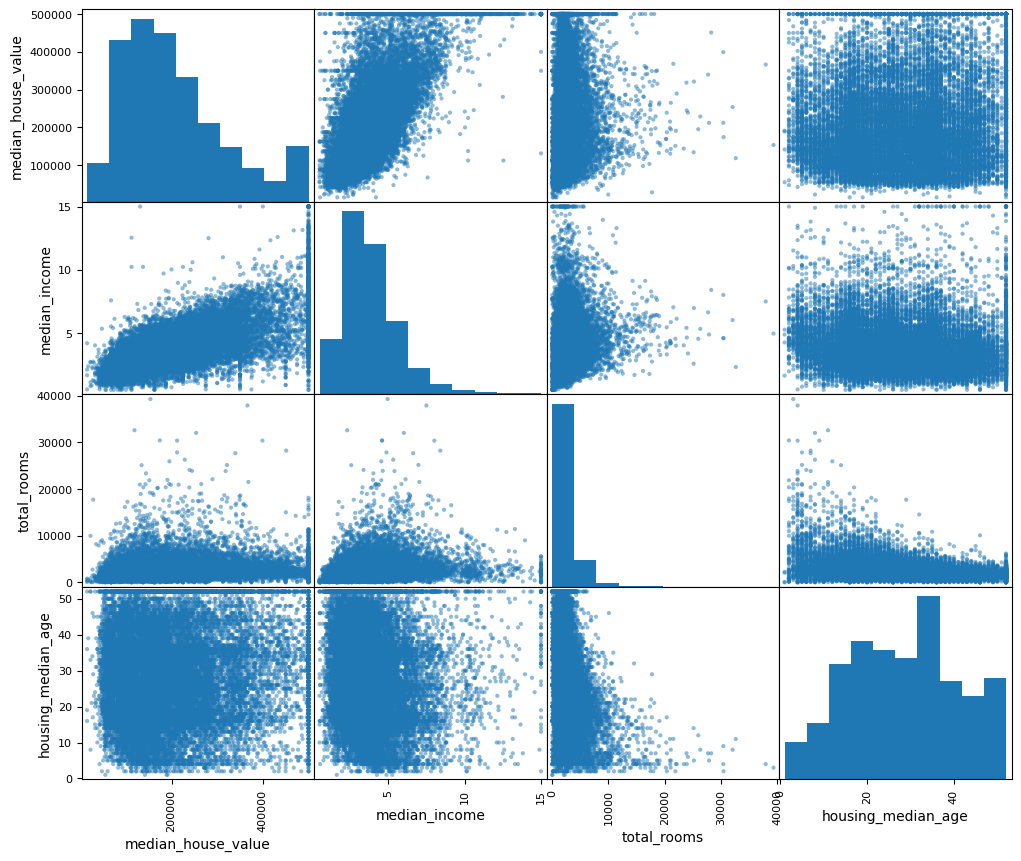

In [178]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,10))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

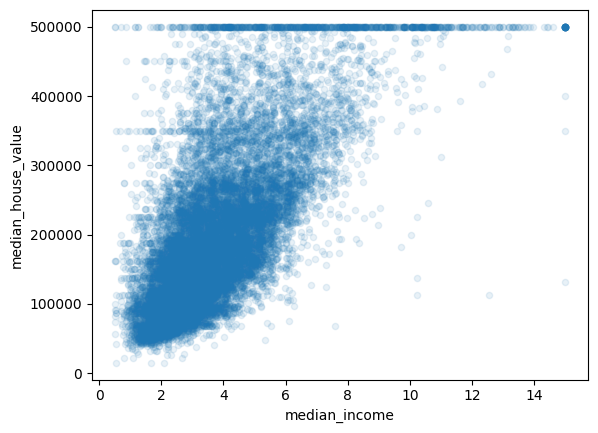

In [179]:
housing_df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### Experimenting with Attribute Combinations

In [180]:
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedroom_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["population"]/housing_df["households"]

In [181]:
housing_df.corr()["median_house_value"].sort_values(ascending=False)

/var/folders/23/9yyjjc7d5qzgg1rk2yt_yhwc0000gn/T/ipykernel_20725/26233448.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_df.corr()["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedroom_per_room           -0.259952
Name: median_house_value, dtype: float64

### Preparing Dataset for Machine Learning Algorithm

In [182]:
housing_df = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [183]:
housing_df.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [184]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_numerical = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_numerical)
print(imputer.statistics_)
print(housing_numerical.median().values)

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05  3.0000e+00]
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05  3.0000e+00]


In [185]:
X = imputer.transform(housing_numerical)

In [186]:
housing_trained = pd.DataFrame(X, columns=housing_numerical.columns)

### Handling Text and Categorical Attributes

In [187]:
#Going to convert ocean_proximity to a numerical value 

from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [188]:
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [189]:
# using one-hot incoding instead where 1 equals to island and 0 equals to not an island

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [190]:
print(housing_cat_1hot.toarray())
print(cat_encoder.categories_)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Custom Transformation that adds automates the attributes room per household and population per household

In [191]:
from sklearn.base import BaseEstimator, TransformerMixin 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, population_ix] / X[:, rooms_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[rooms_per_household, population_per_household]


In [192]:
attribute_adder = CombinedAttributes(add_bedrooms_per_room=False)
housing_extra_attributes = attribute_adder.transform(housing.values)
housing_extra_attributes

array([[0.3659090909090909, 2.5555555555555554],
       [0.3382166502324271, 2.109841827768014],
       [0.338104976141786, 2.8022598870056497],
       ...,
       [0.44676131322094054, 2.325635103926097],
       [0.39838709677419354, 2.1232091690544412],
       [0.4980251346499102, 2.616981132075472]], dtype=object)

### Feature Scaling

In [193]:
 from sklearn.pipeline import Pipeline
 from sklearn.preprocessing import StandardScaler 

 num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), #name, transformer
    ("attribute_adder", CombinedAttributes()), #name, transformer
    ("scarlar", StandardScaler()) #name, transformer
 ])

 housng_num_tr = num_pipeline.fit_transform(housing_numerical)

In [194]:
housng_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.08762704,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.09719317,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.09723175,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.0596973 ,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.07640778,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.04198864,
        -0.04368215,  0.11327519]])

In [195]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_numerical)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes), #name, transformer, list of columns
    ("cat", OneHotEncoder(), cat_attributes) #name, transformer, list of columns
])

housing_prepared = full_pipeline.fit_transform(housing)


### Training the Model

In [196]:
from sklearn.linear_model import LinearRegression

train_set, test_set = train_test_split(housing_prepared, test_size=0.2, random_state=42)
housing_labels = strat_train_set["median_house_value"].copy()

lin_reg = LinearRegression()
lin_reg.fit(train_set, housing_labels)

LinearRegression()

In [197]:
some_data = housing.iloc[:5]
some_label = housing["median_house_value"].iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_label))

Predictions: [205792. 212512. 207392. 205792. 206656.]
Labels: [452600.0, 358500.0, 352100.0, 341300.0, 342200.0]


In [198]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(list(housing_numerical["median_house_value"]), housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

116291.7269083523

### DecisionTreeRegressor

In [199]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, list(housing_numerical["median_house_value"]))
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(list(housing_numerical["median_house_value"]), housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [200]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, list(housing_numerical["median_house_value"]), scoring="neg_mean_squared_error", cv=10)
tree_rmse_score = np.sqrt(-scores)

In [201]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(tree_rmse_score)

Scores: [ 67.70032004 126.33013229  91.64464411  65.99712232 132.23261744
  67.44937809  74.09008763  67.05314333 110.64907164  74.28600711]
Mean 87.74325240202423
Standard Deviation: 24.678310176873726


In [202]:
lin_scores = cross_val_score(lin_reg, housing_prepared, list(housing_numerical["median_house_value"]), scoring="neg_mean_squared_error", cv=10)
lin_rmse_score = np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores: [1.31730368e-10 3.69927284e-10 3.20600240e-10 1.32877270e-10
 6.38943429e+01 2.22839194e-10 3.27761812e-10 5.07256784e-10
 2.89919733e-10 2.29604125e-10]
Mean 6.3894342880443045
Standard Deviation: 19.168302863288744


In [203]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, list(housing_numerical["median_house_value"]))

RandomForestRegressor()

In [204]:
forest_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(forest_prediction, list(housing_numerical["median_house_value"]))
forest_mse

471.04714554748074

In [205]:
scores = cross_val_score(forest_reg, housing_prepared, list(housing_numerical["median_house_value"]), scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-scores)
display_scores(forest_rmse_score)

Scores: [ 52.34025187 146.55242455  47.30937728  35.86099077  82.30986158
  37.12290372  46.72989663  49.28800175  74.02852412  42.68460013]
Mean 61.42268324094889
Standard Deviation: 31.752250160810526


In [206]:
from sklearn.externals import joblib 

joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")

ImportError: cannot import name 'joblib' from 'sklearn.externals' (/opt/homebrew/lib/python3.10/site-packages/sklearn/externals/__init__.py)

### Fine Tuning the Model

In [ ]:
from sklearn.model_selection import GridSearchCV 

param_grid = [ 
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, list(housing_numerical["median_house_value"])) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params, in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

42749.9190095107 {'max_features': 2, 'n_estimators': 3}
34059.35967380918 {'max_features': 2, 'n_estimators': 10}
32544.1790210372 {'max_features': 2, 'n_estimators': 30}
22622.593178634284 {'max_features': 4, 'n_estimators': 3}
16701.157858744307 {'max_features': 4, 'n_estimators': 10}
15411.312563249472 {'max_features': 4, 'n_estimators': 30}
13943.269540719382 {'max_features': 6, 'n_estimators': 3}
9730.591260160107 {'max_features': 6, 'n_estimators': 10}
7864.003054608403 {'max_features': 6, 'n_estimators': 30}
7777.701560186957 {'max_features': 8, 'n_estimators': 3}
6072.208134771962 {'max_features': 8, 'n_estimators': 10}
3975.168960909365 {'max_features': 8, 'n_estimators': 30}
41384.98099619727 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
31304.18037306788 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
32438.774995134103 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
22042.265708118055 {'bootstrap': False, 'max_features': 3, 'n_estimators'

### Evaluting on Test Set

In [ ]:
final_model = grid_search.best_estimator_ 

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

KeyError: "['median_house_value', 'income_cat'] not in index"